<h1>Phase 4: Correlation</h1>



Sentiment Analysis of review comment message

In [1]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('vader_lexicon')

df = pd.read_csv('/content/cleaned-data.csv')

sia = SentimentIntensityAnalyzer()

def analyze_sentiment_vader(text):
    if pd.isna(text):
        return 0.0
    scores = sia.polarity_scores(text)
    return scores['compound']

df['sentiment_polarity'] = df['review_comment_message'].apply(analyze_sentiment_vader)

def classify_sentiment_vader(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment_polarity'].apply(classify_sentiment_vader)

print(df[['review_comment_message', 'sentiment_polarity', 'sentiment_label']].head(10))

df.to_csv('your_file_with_vader_sentiment.csv', index=False)




[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                              review_comment_message  sentiment_polarity  \
0  I haven't tested the product yet, but it came ...              0.5499   
1  I haven't tested the product yet, but it came ...              0.5499   
2  I haven't tested the product yet, but it came ...              0.5499   
3                                 Very good product.              0.4927   
4  The product was exactly what I expected and wa...              0.2732   
5                     Awaiting return from the store              0.0000   
6                     Awaiting return from the store              0.0000   
7                                I liked the product              0.4215   
8  Thank you for your attention. Perfect Lanniste...              0.7351   
9  The Post Office is on strike ... I have not re...             -0.0982   

  sentiment_label  
0        Positive  
1        Positive  
2        Positive  
3        Positive  
4        Positive  
5         Neutral  
6         Neutral  
7  

Main Correlationship between Sentiment Polarity and Reiew Score

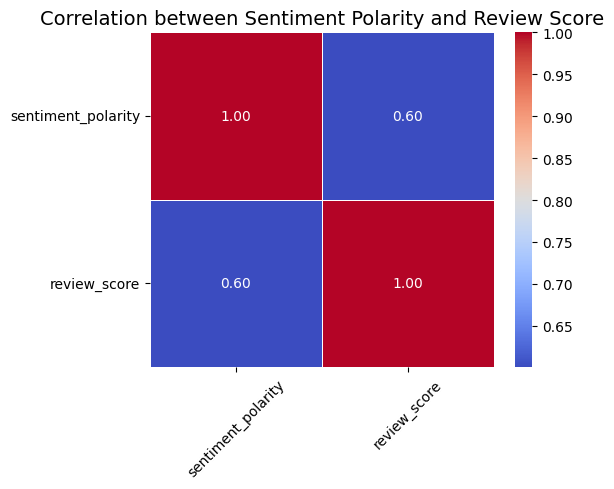

In [ ]:

df = pd.read_csv('/content/your_file_with_vader_sentiment.csv')

numerical_cols = df[['sentiment_polarity', 'review_score']]

correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Sentiment Polarity and Review Score', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Correlation Matrix

Correlation Matrix:

                       price  payment_value  review_score  sentiment_polarity
price               1.000000       0.645355      0.020854            0.026008
payment_value       0.645355       1.000000     -0.109847           -0.062813
review_score        0.020854      -0.109847      1.000000            0.600639
sentiment_polarity  0.026008      -0.062813      0.600639            1.000000


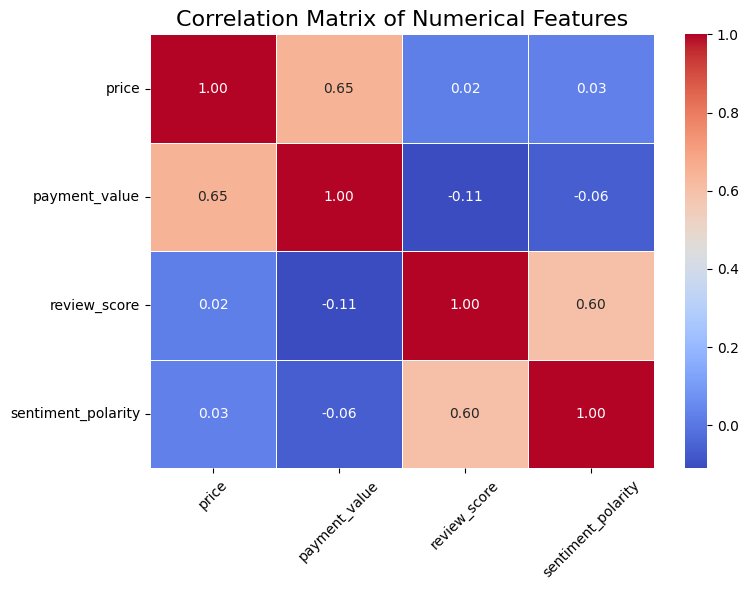

In [ ]:

numerical_cols = df[['price', 'payment_value', 'review_score', 'sentiment_polarity']]

correlation_matrix = numerical_cols.corr()

print("Correlation Matrix:\n")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
